# 4. Сверточные нейронные сети.

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

## 1. Классификация предметов одежды (датасет Fashion MNIST)



### 1.1 Решить задачу классификации, не используя сверточные слои. 
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [122]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

In [123]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
)
trainset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset, shuffle=True
)

In [ ]:
model = nn.Sequential(
    nn.Linear(28*28, 64),
    nn.Tanh(),
    nn.Linear(64, 10)
)
cel = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 10
history = []
loss_list = []

for i in range(epochs):
    loss = 0
    for x_batch, y_batch in trainloader:
        x_batch = x_batch.view(x_batch.shape[0], -1)
        y_batch = y_batch
        y_pred = model(x_batch)
        loss = cel(y_pred, y_batch)
        history.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {i + 1} \t Loss: {history[-1]}')
    loss_list.append(np.mean(history))

Epoch: 1 	 Loss: 0.010957427322864532
Epoch: 2 	 Loss: 0.1065058559179306
Epoch: 3 	 Loss: 0.5900189876556396
Epoch: 4 	 Loss: 2.098061486321967e-05
Epoch: 5 	 Loss: 0.03424854204058647


### 1.2 Решить задачу 1.1, используя сверточную нейронную сеть.
* Добиться значения accuracy на тестовом множестве не менее 90%
* Визуализировать результаты работы первого сверточного слоя

In [91]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [92]:
# define constants
NUM_EPOCHS = 20
BATCH_SIZE = 4
LEARNING_RATE = 0.001

In [93]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [94]:
trainset = torchvision.datasets.FashionMNIST(
    root='./data', train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.FashionMNIST(
    root='./data', train=False,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=BATCH_SIZE,
    shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=BATCH_SIZE,
    shuffle=True
)

In [95]:
classes = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
           'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

torch.Size([4, 1, 28, 28])
torch.Size([4])


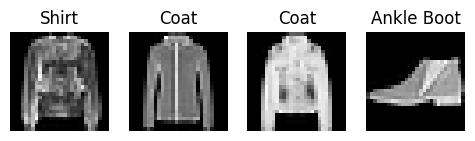

In [96]:
for batch_1 in trainloader:
    batch = batch_1
    break
print(batch[0].shape)  # as batch[0] contains the image pixels -> tensors
print(batch[1].shape)  # batch[1] contains the labels -> tensors
plt.figure(figsize=(12, 8))
for i in range(batch[0].shape[0]):
    plt.subplot(4, 8, i + 1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(28, 28), cmap='gray')
    plt.title(classes[batch[1][i]])
    plt.savefig('fashion_mnist.png')
plt.show()

In [97]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5
        )
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5
        )
        self.fc1 = nn.Linear(in_features=256, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [98]:
# loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [100]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')
print(device)
net.to(device)

cpu


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [101]:
# function to calculate accuracy
def calc_acc(loader):
    correct = 0
    total = 0
    for data in loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return ((100 * correct) / total)

In [102]:
def train():
    epoch_loss = []
    train_acc = []
    test_acc = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            # set parameter gradients to zero
            optimizer.zero_grad()
            # forward pass
            outputs = net(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss.append(running_loss / 15000)
        train_acc.append(calc_acc(trainloader))
        test_acc.append(calc_acc(testloader))
        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'
              % (epoch + 1, NUM_EPOCHS, train_acc[epoch], test_acc[epoch], running_loss / 15000))

    return epoch_loss, train_acc, test_acc

In [103]:
start = time.time()
epoch_loss, train_acc, test_acc = train()
end = time.time()
print('%0.2f minutes' % ((end - start) / 60))

Epoch: 1 of 20, Train Acc: 85.488, Test Acc: 84.580, Loss: 0.648
Epoch: 2 of 20, Train Acc: 87.980, Test Acc: 86.830, Loss: 0.378
Epoch: 3 of 20, Train Acc: 89.090, Test Acc: 87.450, Loss: 0.323
Epoch: 4 of 20, Train Acc: 89.647, Test Acc: 87.810, Loss: 0.296
Epoch: 5 of 20, Train Acc: 89.437, Test Acc: 87.580, Loss: 0.276
Epoch: 6 of 20, Train Acc: 91.155, Test Acc: 88.910, Loss: 0.259
Epoch: 7 of 20, Train Acc: 91.572, Test Acc: 88.920, Loss: 0.246
Epoch: 8 of 20, Train Acc: 92.022, Test Acc: 89.170, Loss: 0.236
Epoch: 9 of 20, Train Acc: 91.363, Test Acc: 88.690, Loss: 0.226
Epoch: 10 of 20, Train Acc: 92.807, Test Acc: 89.340, Loss: 0.218
Epoch: 11 of 20, Train Acc: 92.583, Test Acc: 89.540, Loss: 0.207
Epoch: 12 of 20, Train Acc: 92.992, Test Acc: 89.520, Loss: 0.203
Epoch: 13 of 20, Train Acc: 93.518, Test Acc: 89.560, Loss: 0.195
Epoch: 14 of 20, Train Acc: 93.615, Test Acc: 89.650, Loss: 0.187
Epoch: 15 of 20, Train Acc: 93.868, Test Acc: 89.300, Loss: 0.182
Epoch: 16 of 20, Tr

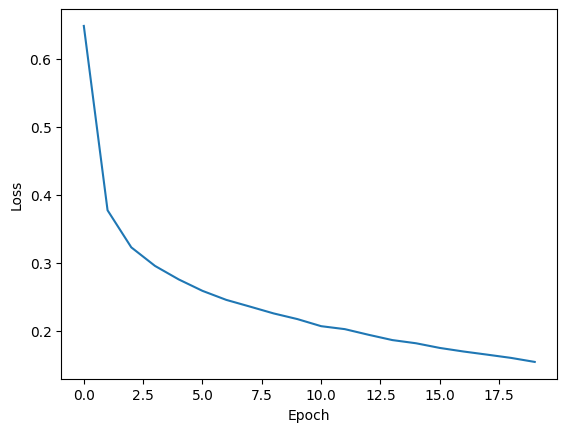

In [104]:
plt.figure()
plt.plot(epoch_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('fashion_loss.png')
plt.show()

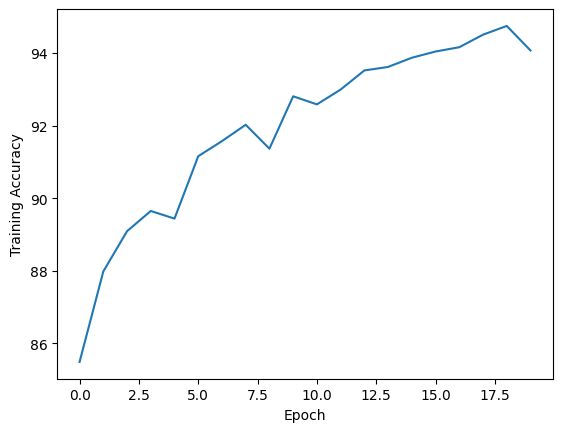

In [105]:
plt.figure()
plt.plot(train_acc)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.savefig('fashion_train_acc.png')
plt.show()

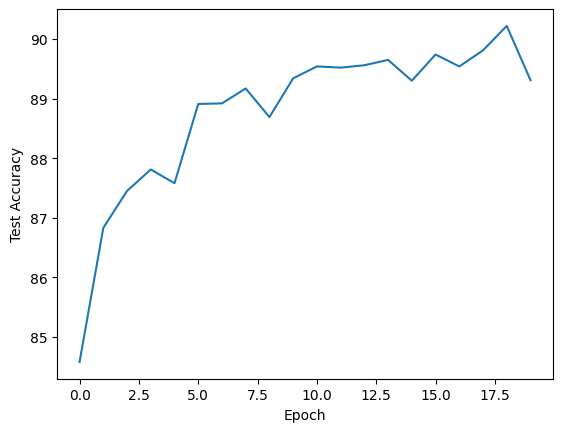

In [106]:
plt.figure()
plt.plot(test_acc)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.savefig('fashion_test_acc.png')
plt.show()

##  2. Классификация изображений (датасет CIFAR 10) 


### 2.1 Решить задачу классификации, не используя сверточные слои. 

* Нормализовать данные (если необходимо)
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
data_tfs = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5), (0.5))
])

# install for train and test
root = './'
train = datasets.CIFAR10(root, train=True,  transform=data_tfs, download=True)
test  = datasets.CIFAR10(root, train=False, transform=data_tfs, download=True)

print(f'Data size:\n\t train {len(train)},\n\t test {len(test)}')
print(f'Data shape:\n\t features {train[0][0].shape},\n\t target {type(test[0][1])}')

Files already downloaded and verified
Files already downloaded and verified
Data size:
	 train 50000,
	 test 10000
Data shape:
	 features torch.Size([3, 32, 32]),
	 target <class 'int'>


In [ ]:
batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

In [ ]:
model = nn.Sequential(
  nn.Linear(3*32*32, 128),
  nn.ReLU(),
  nn.Linear(128, 64),
  nn.ReLU(),
  nn.Linear(64, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

In [ ]:
epochs = 10
history = []
loss_list = []

for epoch in range(epochs):
  for x_batch, y_batch in train_loader:
    x_batch = x_batch.view(x_batch.shape[0], -1)
    y_batch = y_batch

    logits = model(x_batch)
    loss = criterion(logits, y_batch)
    history.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'{epoch} \t Loss: {loss.item()}')
  loss_list.append(sum(history) / len(history))

1,	 loss: 1.3856582641601562
2,	 loss: 1.215413212776184
3,	 loss: 1.1127994060516357
4,	 loss: 1.013433814048767
5,	 loss: 0.9565374255180359
6,	 loss: 0.891997754573822
7,	 loss: 0.8385235071182251
8,	 loss: 0.796837568283081
9,	 loss: 0.7648223638534546
10,	 loss: 0.7586273550987244


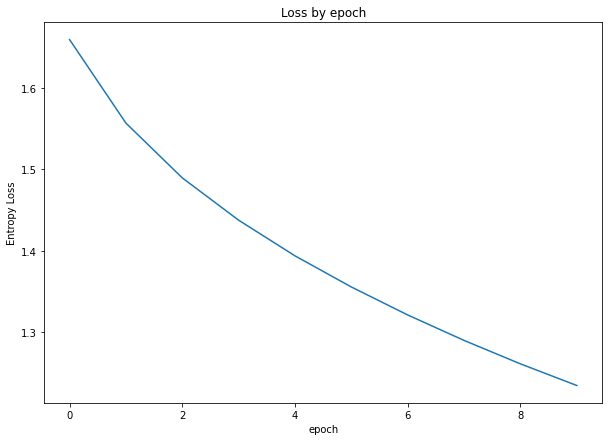

In [ ]:
def draw_losses(losses):
  plt.figure(figsize=(10, 7))

  plt.plot(losses)

  plt.title('Loss by epoch')
  plt.ylabel('Entropy Loss')
  plt.xlabel('epoch')

  plt.show()

draw_losses(loss_list)

Test accuracy 0.524


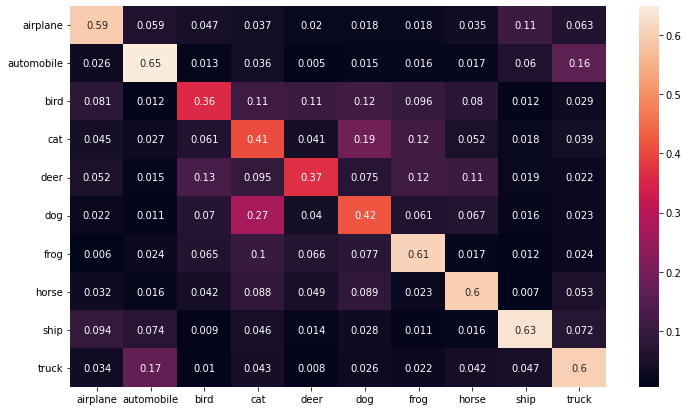

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []
acc = 0
batches = 0

# iterate over test data
for x_batch, y_batch in test_loader:
        batches += 1
        output = model(x_batch.view(x_batch.shape[0], -1)) # Feed Network

        output = torch.argmax(model(x_batch.view(x_batch.shape[0], -1)), dim=1)
        y_pred.extend(output) # Save Prediction

        labels = y_batch.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
        acc += (output==y_batch).numpy().mean()

# constant for classes
classes = test.classes

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
#plt.savefig('output.png')
print(f'Test accuracy {acc / batches:.3}')

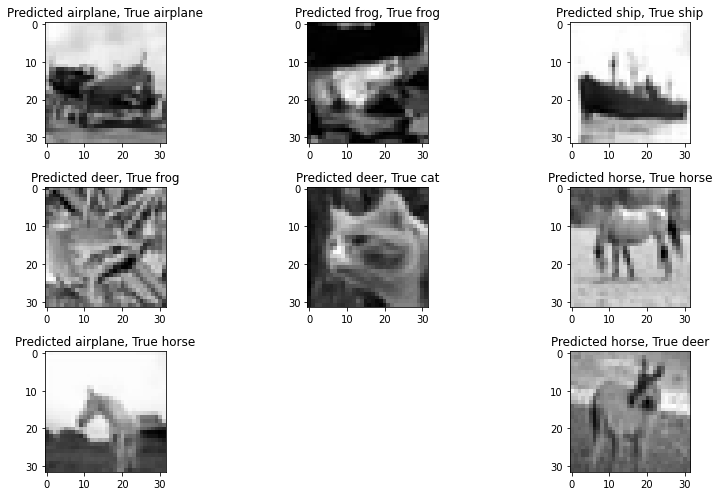

In [ ]:
import random

classes = test.classes
plt.figure(figsize = (12,7))
for i in range(9):
      plt.subplot(3,3,i+1)
      obj = random.randint(0, batch_size-1)
      plt.imshow(next(iter(test_loader))[0][obj][0, :, :], cmap='gray', interpolation='none')
      plt.title("Predicted {}, True {}".format(test.classes[y_pred[obj]], test.classes[y_true[obj]]))
      plt.tight_layout()

### 2.2 Решить задачу 2.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 70%.
* Визуализировать результаты работы первого сверточного слоя

In [107]:
import torch
import torchvision
import torchvision.transforms as transforms

In [108]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


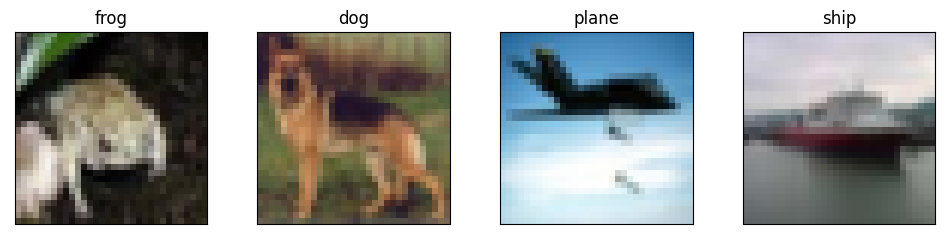

In [109]:
import matplotlib.pyplot as plt
import numpy as np

def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

dataiter = iter(trainloader)
images, labels = next(dataiter)

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [110]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [111]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [112]:
import os

epochs = 20

model_directory_path = 'model/'
model_path = model_directory_path + 'cifar-10-cnn-model.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f"Epoch: {epoch + 1}, %5d] Loss: {running_loss / 2000}")
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')


Loaded model parameters from disk.


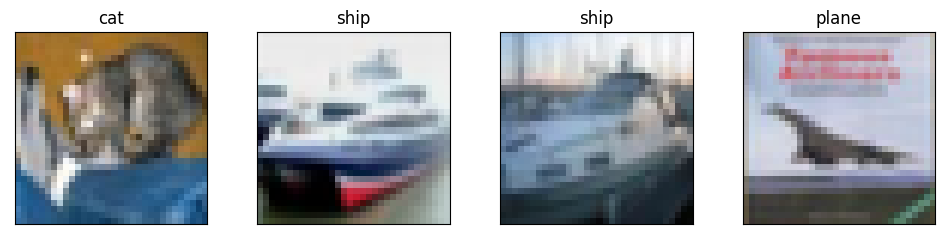

In [113]:
dataiter = iter(testloader)
images, labels = next(dataiter)

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [114]:
outputs = net(images)
outputs

tensor([[-1.1896, -2.4439,  1.7596,  2.1849,  0.4938,  2.3257,  1.4534, -0.5023,
         -1.5867, -2.2555],
        [ 4.2998,  5.5746, -2.6324, -1.5947, -3.6260, -4.0349, -4.4960, -4.5239,
          9.1822,  3.7152],
        [ 1.5185,  2.0459, -1.1219, -0.4080, -1.5551, -1.7109, -1.9686, -2.0962,
          3.5274,  2.1351],
        [ 3.3134,  1.4292,  0.1416, -0.8085, -0.7861, -3.0044, -1.8519, -3.1761,
          5.3315,  0.7987]], grad_fn=<AddmmBackward0>)

In [115]:
sm = nn.Softmax(dim=1)
sm_outputs = sm(outputs)
print(sm_outputs)

tensor([[9.4649e-03, 2.7001e-03, 1.8069e-01, 2.7646e-01, 5.0953e-02, 3.1827e-01,
         1.3303e-01, 1.8819e-02, 6.3624e-03, 3.2597e-03],
        [7.2949e-03, 2.6100e-02, 7.1188e-06, 2.0094e-05, 2.6358e-06, 1.7511e-06,
         1.1042e-06, 1.0738e-06, 9.6251e-01, 4.0656e-03],
        [8.0888e-02, 1.3707e-01, 5.7702e-03, 1.1783e-02, 3.7414e-03, 3.2016e-03,
         2.4745e-03, 2.1780e-03, 6.0304e-01, 1.4986e-01],
        [1.1311e-01, 1.7188e-02, 4.7425e-03, 1.8340e-03, 1.8755e-03, 2.0405e-04,
         6.4602e-04, 1.7186e-04, 8.5108e-01, 9.1492e-03]],
       grad_fn=<SoftmaxBackward0>)


In [116]:
probs, index = torch.max(sm_outputs, dim=1)

for p, i in zip(probs, index):
    print('{0} - {1:.4f}'.format(classes[i], p))

dog - 0.3183
ship - 0.9625
ship - 0.6030
ship - 0.8511


In [117]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 53.35%


In [118]:
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 45.5
car        - 55.2
bird       - 57.7
cat        - 18.7
deer       - 25.0
dog        - 67.8
frog       - 78.2
horse      - 42.5
ship       - 77.5
truck      - 65.4


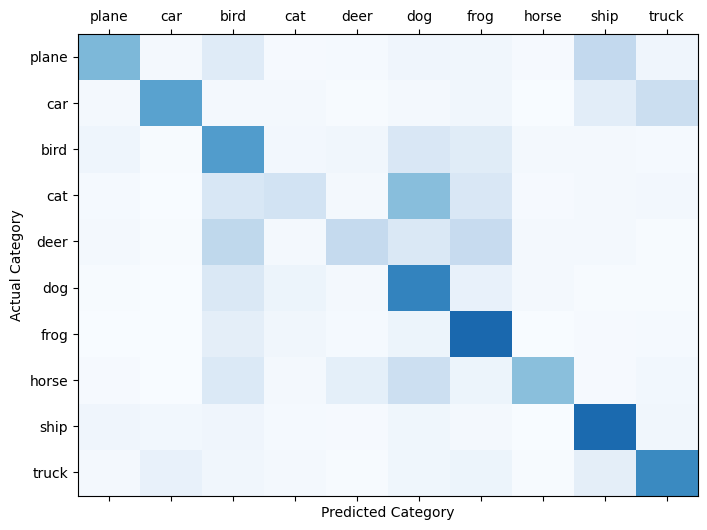

In [119]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

In [120]:
print('actual/pred'.ljust(16), end='')
for i,c in enumerate(classes):
    print(c.ljust(10), end='')
print()
for i,r in enumerate(confusion_matrix):
    print(classes[i].ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()

    r = r/np.sum(r)
    print(''.ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()


actual/pred     plane     car       bird      cat       deer      dog       frog      horse     ship      truck     
plane           455       21        119       9         14        40        34        8         260       40        
                0.455     0.021     0.119     0.009     0.014     0.04      0.034     0.008     0.26      0.04      
car             23        552       20        16        7         22        35        3         103       219       
                0.023     0.552     0.02      0.016     0.007     0.022     0.035     0.003     0.103     0.219     
bird            44        5         577       25        32        152       115       16        20        14        
                0.044     0.005     0.577     0.025     0.032     0.152     0.115     0.016     0.02      0.014     
cat             12        2         155       187       18        426       151       9         16        24        
                0.012     0.002     0.155     0.187     0.018   

## 3. Загрузка изображений из внешних источников

### 3.1 Решить задачу классификации обезьян (датасет [monkey.zip](https://disk.yandex.ru/d/OxYgY4S7aR6ulQ)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 60%

In [121]:
from google.colab import drive

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import zipfile
from tqdm import tqdm

zf = zipfile.ZipFile('drive/MyDrive/datasets/monkeys.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

### 3.2 Решить задачу классификации собак и кошек (датасет [cats_dogs.zip](https://disk.yandex.ru/d/wQtt5O1JF9ctnA)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 80%

# 4. Transfer Learning

### 4.1 Решить задачу 3.1, воспользовавшись предобученной моделью VGG16
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель (не замораживать веса). Вычислить значение accuracy на тестовом множестве
* Дообучить модель (заморозить все веса, кроме последнего блока слоев (`classifier`)). 
* Вычислить значение accuracy на тестовом множестве.


### 4.2 Решить задачу 3.2, воспользовавшись подходящей предобученной моделью
* Не использовать VGG16 (вместо нее можно взять resnet18 или другую)
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель. 
* Вычислить значение accuracy на тестовом множестве (добиться значения не меньше 97-98%)